# import Library and data

In [1]:
import re
import os

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.model_selection as model_selection
import sklearn.metrics as metrics 

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/Kaggle/Quora_pairs_question/train.csv.zip')
#you can change the path to be consist with your 

# Data Analysis

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              404287 non-null  int64 
 1   qid1            404287 non-null  int64 
 2   qid2            404287 non-null  int64 
 3   question1       404287 non-null  object
 4   question2       404287 non-null  object
 5   is_duplicate    404287 non-null  int64 
 6   q1_word_length  404287 non-null  int64 
 7   q2_word_length  404287 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 27.8+ MB


In [ ]:
train_df.dropna(inplace=True)

In [ ]:
train_df['q1_word_length']=train_df['question1'].apply(lambda x: len(x.split()))
train_df['q2_word_length']=train_df['question2'].apply(lambda x:len(x.split()))

In [ ]:
train_df['q1_word_length'].describe()

count    404287.000000
mean         10.942256
std           5.428812
min           1.000000
25%           7.000000
50%          10.000000
75%          13.000000
max         125.000000
Name: q1_word_length, dtype: float64

In [ ]:
train_df['q2_word_length'].describe()

count    404287.000000
mean         11.182017
std           6.305210
min           1.000000
25%           7.000000
50%          10.000000
75%          13.000000
max         237.000000
Name: q2_word_length, dtype: float64

(array([3.11839e+05, 8.25070e+04, 9.07300e+03, 6.82000e+02, 1.60000e+02,
        2.30000e+01, 2.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  1. ,  13.4,  25.8,  38.2,  50.6,  63. ,  75.4,  87.8, 100.2,
        112.6, 125. ]),
 <a list of 10 Patch objects>)

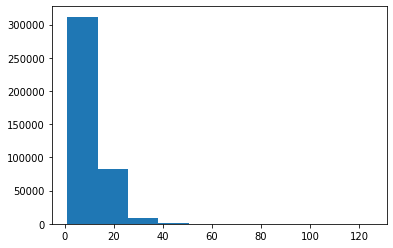

In [ ]:
plt.hist(train_df['q1_word_length'])

(array([3.86785e+05, 1.66370e+04, 8.09000e+02, 2.50000e+01, 1.00000e+01,
        4.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.60000e+01]),
 array([  1. ,  24.6,  48.2,  71.8,  95.4, 119. , 142.6, 166.2, 189.8,
        213.4, 237. ]),
 <a list of 10 Patch objects>)

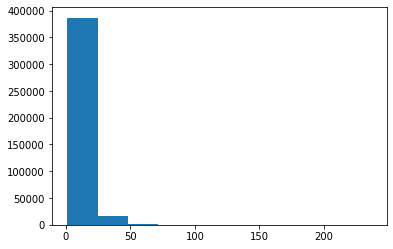

In [ ]:
plt.hist(train_df['q2_word_length'])

as we can see the length of sequnce contains about 40 to  50 word.
and the sentance that has more than 50 word is to less so the Max_squnce_lenght will be 50

In [ ]:
Max_sequnce_lenght=50

In [ ]:
train_df['is_duplicate'].value_counts()

0    255024
1    149263
Name: is_duplicate, dtype: int64

the data is not much skew

# Cleaning

In [ ]:
import nltk
#nltk.download('all')
nltk.download('popular')

In [ ]:

from nltk.corpus import stopwords

STOPWORDS=set(stopwords.words('english'))
lemmatizer=nltk.WordNetLemmatizer()
stemmer=nltk.LancasterStemmer()

In [ ]:
train_df['q1_stop_word_count']=train_df['question1'].apply(lambda x: len([word for word in x.split() if word in STOPWORDS]))
train_df['q2_stop_word_count']=train_df['question2'].apply(lambda x: len([word for word in x.split() if word in STOPWORDS]))

In [ ]:
train_df['q1_stop_word_count'].describe()

count    404287.000000
mean          4.041926
std           2.682324
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          59.000000
Name: q1_stop_word_count, dtype: float64

In [ ]:
train_df['q2_stop_word_count'].describe()

count    404287.000000
mean          4.165135
std           3.062305
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max         115.000000
Name: q2_stop_word_count, dtype: float64

(array([3.16307e+05, 7.99370e+04, 7.27900e+03, 6.14000e+02, 1.27000e+02,
        1.70000e+01, 5.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0. ,  5.9, 11.8, 17.7, 23.6, 29.5, 35.4, 41.3, 47.2, 53.1, 59. ]),
 <a list of 10 Patch objects>)

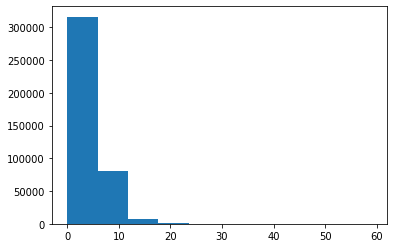

In [ ]:
plt.hist(train_df['q1_stop_word_count'])

we will remove stop word from the sentense 

The clean function will remove stop word will do lemmatization and stemming for word also will remove each charecter that not in alphabit or digit

In [ ]:
def clean(data):
  data=re.sub(r'[^a-zA-Z0-9,]',' ',data)
  data=data.lower()
  res=[word for word in data.split() if word not in STOPWORDS]
  res=[stemmer.stem(word) for word in res]
  res=[lemmatizer.lemmatize(word) for word in res]
  return ' '.join(res)

In [ ]:
train_df['clean_question1']=train_df['question1'].apply(clean)
train_df['clean_question2']=train_df['question2'].apply(clean)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  404287 non-null  int64 
 1   qid1                404287 non-null  int64 
 2   qid2                404287 non-null  int64 
 3   question1           404287 non-null  object
 4   question2           404287 non-null  object
 5   is_duplicate        404287 non-null  int64 
 6   q1_word_length      404287 non-null  int64 
 7   q2_word_length      404287 non-null  int64 
 8   q1_stop_word_count  404287 non-null  int64 
 9   q2_stop_word_count  404287 non-null  int64 
 10  clean_question1     404287 non-null  object
 11  clean_question2     404287 non-null  object
dtypes: int64(8), object(4)
memory usage: 40.1+ MB


In [ ]:
train_df['word_count_1']=train_df['clean_question1'].apply(lambda x:len(x.split()))
train_df['word_count_2']=train_df['clean_question2'].apply(lambda x:len(x.split()))

we will see the number of word of clean text and if ther sentense that has zero word so we will drop it

In [ ]:
train_df=train_df[train_df['word_count_1']!=0]
train_df=train_df[train_df['word_count_2']!=0]

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404148 entries, 0 to 404289
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  404148 non-null  int64 
 1   qid1                404148 non-null  int64 
 2   qid2                404148 non-null  int64 
 3   question1           404148 non-null  object
 4   question2           404148 non-null  object
 5   is_duplicate        404148 non-null  int64 
 6   q1_word_length      404148 non-null  int64 
 7   q2_word_length      404148 non-null  int64 
 8   q1_stop_word_count  404148 non-null  int64 
 9   q2_stop_word_count  404148 non-null  int64 
 10  clean_question1     404148 non-null  object
 11  clean_question2     404148 non-null  object
 12  word_count_1        404148 non-null  int64 
 13  word_count_2        404148 non-null  int64 
dtypes: int64(10), object(4)
memory usage: 46.3+ MB


In [ ]:
train_df['word_count_1'].describe()

count    404148.000000
mean          5.552204
std           3.042352
min           1.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          56.000000
Name: word_count_1, dtype: float64

we will save this data frame,so we dont need to do clean operation each time

In [ ]:
train_df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_word_length', 'q2_word_length', 'q1_stop_word_count',
       'q2_stop_word_count', 'clean_question1', 'clean_question2',
       'word_count_1', 'word_count_2'],
      dtype='object')

In [ ]:
train_df=train_df[['id','qid1','qid2','question1','question2','is_duplicate','clean_question1','clean_question2']]

In [ ]:
train_df.to_csv('/content/drive/MyDrive/Kaggle/Quora_pairs_question/clean_df.csv',index=False)

# Tokenizing The data

In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/Kaggle/Quora_pairs_question/clean_df.csv')

In [ ]:
X_train,X_val=model_selection.train_test_split(train_df,test_size=0.1,stratify=train_df['is_duplicate'],random_state=42)
# we use stratify paraemter to split data as the distrepution we have

In [ ]:
y_train=X_train['is_duplicate'].values
X_train_q1=X_train['clean_question1'].values
X_train_q2=X_train['clean_question2'].values
y_val=X_val['is_duplicate'].values
X_val_q1=X_val['clean_question1'].values
X_val_q2=X_val['clean_question2'].values

In [ ]:
y_train.shape,y_val.shape

((363732,), (40415,))

In [ ]:
tokenizer=keras.preprocessing.text.Tokenizer()

In [ ]:
tokenizer.fit_on_texts(train_df['clean_question1'].values+train_df['clean_question2'].values)

In [ ]:
vocab_size=len(tokenizer.word_index)+1

vocab_size

268166

Save the Tokenizer for testing operation

In [ ]:
import pickle

with open('/content/drive/MyDrive/Kaggle/Quora_pairs_question/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
import pickle
with open('/content/drive/MyDrive/Kaggle/Quora_pairs_question/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)


In [ ]:
vocab_size=len(tokenizer.word_index)+1

In [ ]:
Max_sequnce_lenght=50

In [ ]:
X_train_q1=tokenizer.texts_to_sequences(X_train_q1)
X_train_q2=tokenizer.texts_to_sequences(X_train_q2)
X_val_q1=tokenizer.texts_to_sequences(X_val_q1)
X_val_q2=tokenizer.texts_to_sequences(X_val_q2)

X_train_q1_set=keras.preprocessing.sequence.pad_sequences(X_train_q1,padding='post',maxlen=Max_sequnce_lenght)
X_train_q2_set=keras.preprocessing.sequence.pad_sequences(X_train_q2,padding='post',maxlen=Max_sequnce_lenght)
X_val_q1_set=keras.preprocessing.sequence.pad_sequences(X_val_q1,padding='post',maxlen=Max_sequnce_lenght)
X_val_q2_set=keras.preprocessing.sequence.pad_sequences(X_val_q2,padding='post',maxlen=Max_sequnce_lenght)

X_train_q2_set.shape,X_train_q1_set.shape,X_val_q1_set.shape,X_val_q2_set.shape

((363732, 50), (363732, 50), (40415, 50), (40415, 50))

In [ ]:
y_train=y_train.astype(np.uint8)
y_val=y_val.astype(np.uint8)

# Embedding

In [ ]:
!unzip /content/drive/MyDrive/glove.6B.zip

Archive:  /content/drive/MyDrive/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
embading_index={}
path = '/content/glove.6B.300d.txt'
with open(path) as f:
  for line in f:
    key,value=line.split(maxsplit=1)
    value=np.fromstring(value,"f",sep=" ")
    embading_index[key]=value

print("Found {} word vector".format(len(embading_index)))

embading_dim=300
num_tokens=vocab_size

embading_matrix=np.zeros((num_tokens,embading_dim))
for word,value in tokenizer.word_index.items():
  embading_vector=embading_index.get(word)
  if embading_vector is not None:
      embading_matrix[value]=embading_vector



Found 400000 word vector


In [ ]:
X_train_set=tf.data.Dataset.from_tensor_slices(((X_train_q1_set,X_train_q2_set),y_train)).batch(1024).prefetch(8)
X_val_set=tf.data.Dataset.from_tensor_slices(((X_val_q1_set,X_val_q2_set),y_val)).batch(1024).prefetch(8)

# Creat Model

In [ ]:
emb_layer=keras.layers.Embedding(input_dim=vocab_size,
                                 output_dim=embading_dim,
                                 embeddings_initializer=keras.initializers.Constant(embading_matrix),
                                 input_length=Max_sequnce_lenght,
                                 trainable=True,
                                 mask_zero=True)

In [ ]:
keras.backend.clear_session()
#First Question input
input_1=keras.layers.Input(shape=(Max_sequnce_lenght,))
#Second Question input
input_2=keras.layers.Input(shape=(Max_sequnce_lenght,))

#Embedding First Question 
emb_1=emb_layer(input_1)

#Embedding Second Question
emb_2=emb_layer(input_2)

#Fiture Extraction for first question
X_1=keras.layers.Bidirectional(keras.layers.GRU(128,return_sequences=True))(emb_1)
X_1=keras.layers.GRU(128)(X_1)
X_1=keras.layers.Dropout(0.2)(X_1)


#Fiture Extraction for second question
X_2=keras.layers.Bidirectional(keras.layers.GRU(128,return_sequences=True))(emb_2)
X_2=keras.layers.GRU(128)(X_2)
X_2=keras.layers.Dropout(0.2)(X_2)

con=keras.layers.concatenate([X_1,X_2])
con=keras.layers.Dense(32,activation='relu')(con)
con=keras.layers.Dropout(0.2)(con)

output=keras.layers.Dense(1,activation='sigmoid')(con)

model=keras.Model(inputs=[input_1,input_2],outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 300)      80449800    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 50, 256)      330240      embedding[0][0]              

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [ ]:
# this Function is for learning rate schedule 
# so the learning rate change depending of the val_loss
# this function is get better result than ReduceLROnPlateau function that come with keras

LR_START = 0.0000001
LR_MIN = 0.000001
LR_MAX = 0.0008
LR_RAMPUP_EPOCHS = 3
LR_SUSTAIN_EPOCHS = 0
LR_EXP_DECAY = .8

def lr_schedule(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr


In [ ]:
erlay_stop=keras.callbacks.EarlyStopping(patience=3,monitor='val_loss')
check_point=keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Kaggle/Quora_pairs_question/model.h5',save_best_only=True)
lr_scheduler=keras.callbacks.LearningRateScheduler(lr_schedule)
callbacks_list=[erlay_stop,check_point,lr_scheduler]

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
with tf.device('/device:GPU:0'):
  history=model.fit(X_train_set,validation_data=(X_val_set),epochs=20,callbacks=callbacks_list)

Epoch 1/20
711/711 [==============================] - 619s 838ms/step - loss: 0.7062 - acc: 0.4547 - val_loss: 0.7002 - val_acc: 0.4675
Epoch 2/20
711/711 [==============================] - 605s 851ms/step - loss: 0.5831 - acc: 0.6908 - val_loss: 0.4957 - val_acc: 0.7577
Epoch 3/20
711/711 [==============================] - 618s 869ms/step - loss: 0.4883 - acc: 0.7625 - val_loss: 0.4633 - val_acc: 0.7771
Epoch 4/20
711/711 [==============================] - 619s 871ms/step - loss: 0.4427 - acc: 0.7884 - val_loss: 0.4546 - val_acc: 0.7862
Epoch 5/20
711/711 [==============================] - 627s 881ms/step - loss: 0.3902 - acc: 0.8157 - val_loss: 0.4587 - val_acc: 0.7933
Epoch 6/20
711/711 [==============================] - 608s 856ms/step - loss: 0.3488 - acc: 0.8365 - val_loss: 0.4675 - val_acc: 0.7987
Epoch 7/20
711/711 [==============================] - 607s 854ms/step - loss: 0.3165 - acc: 0.8527 - val_loss: 0.4969 - val_acc: 0.8000


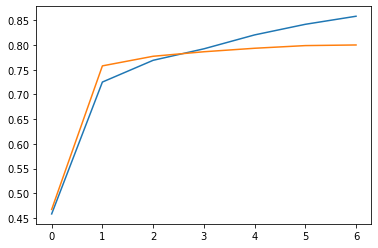

In [ ]:
train_acc=history.history['acc']
val_acc=history.history['val_acc']
train_loss=history.history['loss']
val_loss=history.history['val_loss']
y=range(7)
plt.plot(y,train_acc)
plt.plot(y,val_acc)

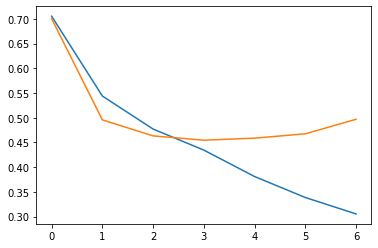

In [ ]:
plt.plot(y,train_loss)
plt.plot(y,val_loss)

# Creat model_2

In [ ]:
emb_layer=keras.layers.Embedding(input_dim=vocab_size,
                                 output_dim=embading_dim,
                                 embeddings_initializer=keras.initializers.Constant(embading_matrix),
                                 input_length=Max_sequnce_lenght,
                                 trainable=True,
                                 mask_zero=True)

In [ ]:
keras.backend.clear_session()
#First Question input
input_1=keras.layers.Input(shape=(Max_sequnce_lenght,))
#Second Question input
input_2=keras.layers.Input(shape=(Max_sequnce_lenght,))

#Embedding First Question 
emb_1=emb_layer(input_1)

#Embedding Second Question
emb_2=emb_layer(input_2)

#Fiture Extraction for first question
X_1=keras.layers.Bidirectional(keras.layers.GRU(128,return_sequences=True))(emb_1)
X_1=keras.layers.Dropout(0.2)(X_1)


#Fiture Extraction for second question
X_2=keras.layers.Bidirectional(keras.layers.GRU(128,return_sequences=True))(emb_2)
X_2=keras.layers.Dropout(0.2)(X_2)

con=keras.layers.concatenate([X_1,X_2])
con=keras.layers.Bidirectional(keras.layers.GRU(128))(con)
con=keras.layers.Dropout(0.2)(con)

output=keras.layers.Dense(1,activation='sigmoid')(con)

model=keras.Model(inputs=[input_1,input_2],outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 300)      80449800    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 50, 256)      330240      embedding[2][0]              

In [ ]:
# this Function is for learning rate schedule 
# so the learning rate change depending of the val_loss
# this function is get better result than ReduceLROnPlateau function that come with keras

LR_START = 0.0000001
LR_MIN = 0.000001
LR_MAX = 0.0008
LR_RAMPUP_EPOCHS = 3
LR_SUSTAIN_EPOCHS = 0
LR_EXP_DECAY = .8

def lr_schedule(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr


In [ ]:
erlay_stop=keras.callbacks.EarlyStopping(patience=3,monitor='val_loss')
check_point=keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Kaggle/Quora_pairs_question/model_2.h5',save_best_only=True,save_weights_only=True)
lr_scheduler=keras.callbacks.LearningRateScheduler(lr_schedule)
callbacks_list=[erlay_stop,check_point,lr_scheduler]

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.RMSprop(0.0001),metrics=['accuracy'])

In [ ]:
with tf.device('/device:GPU:0'):
  history=model.fit(X_train_set,epochs=20,validation_data=(X_val_set),callbacks=callbacks_list)

Epoch 1/20
356/356 [==============================] - 208s 525ms/step - loss: 0.7173 - accuracy: 0.4490 - val_loss: 0.7127 - val_accuracy: 0.4482
Epoch 2/20
356/356 [==============================] - 177s 495ms/step - loss: 0.5942 - accuracy: 0.6808 - val_loss: 0.5209 - val_accuracy: 0.7402
Epoch 3/20
356/356 [==============================] - 176s 492ms/step - loss: 0.5141 - accuracy: 0.7444 - val_loss: 0.4921 - val_accuracy: 0.7578
Epoch 4/20
356/356 [==============================] - 174s 488ms/step - loss: 0.4758 - accuracy: 0.7683 - val_loss: 0.4683 - val_accuracy: 0.7724
Epoch 5/20
356/356 [==============================] - 173s 486ms/step - loss: 0.4344 - accuracy: 0.7935 - val_loss: 0.4604 - val_accuracy: 0.7796
Epoch 6/20
356/356 [==============================] - 173s 485ms/step - loss: 0.4016 - accuracy: 0.8137 - val_loss: 0.4539 - val_accuracy: 0.7863
Epoch 7/20
356/356 [==============================] - 173s 483ms/step - loss: 0.3756 - accuracy: 0.8276 - val_loss: 0.4484 -

In [ ]:
json_model=model.to_json()
with open('/content/drive/MyDrive/Kaggle/Quora_pairs_question/json_model.json','w') as f:
  f.write(json_model)

In [ ]:
acc=history.history['accuracy']
loss_acc=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']
y=range(len(acc))

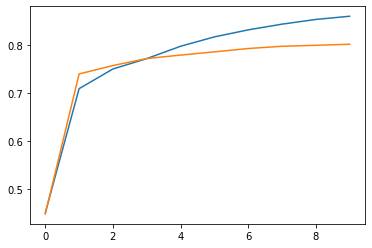

In [ ]:
plt.plot(y,acc)
plt.plot(y,val_acc)

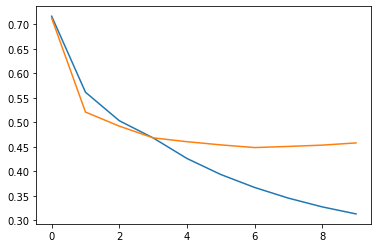

In [ ]:
plt.plot(y,loss_acc)
plt.plot(y,val_loss)

# Training_without_remove_STOPWORD

In [ ]:
import nltk
#nltk.download('all')
nltk.download('popular')

In [ ]:

import nltk
nltk.download('popular')
lemmatizer=nltk.WordNetLemmatizer()
stemmer=nltk.LancasterStemmer()

In [ ]:
def clean(data):
  data=re.sub(r'[^a-zA-Z0-9,]',' ',data)
  data=data.lower()
  #res=[word for word in data.split() if word not in STOPWORDS]
  res=[stemmer.stem(word) for word in data.split()]
  res=[lemmatizer.lemmatize(word) for word in res]
  return ' '.join(res)

In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/Kaggle/Quora_pairs_question/train.csv.zip')

In [ ]:
train_df.dropna(inplace=True)

In [ ]:
train_df['clean_question1']=train_df['question1'].apply(clean)
train_df['clean_question2']=train_df['question2'].apply(clean)

In [ ]:
train_df['word_1']=train_df['clean_question1'].apply(lambda x:len(x.split()))
train_df['word_2']=train_df['clean_question2'].apply(lambda x:len(x.split()))

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               404287 non-null  int64 
 1   qid1             404287 non-null  int64 
 2   qid2             404287 non-null  int64 
 3   question1        404287 non-null  object
 4   question2        404287 non-null  object
 5   is_duplicate     404287 non-null  int64 
 6   clean_question1  404287 non-null  object
 7   clean_question2  404287 non-null  object
 8   word_1           404287 non-null  int64 
 9   word_2           404287 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 33.9+ MB


In [ ]:
train_df=train_df[train_df['word_1']!=0]
train_df=train_df[train_df['word_2']!=0]

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404266 entries, 0 to 404289
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               404266 non-null  int64 
 1   qid1             404266 non-null  int64 
 2   qid2             404266 non-null  int64 
 3   question1        404266 non-null  object
 4   question2        404266 non-null  object
 5   is_duplicate     404266 non-null  int64 
 6   clean_question1  404266 non-null  object
 7   clean_question2  404266 non-null  object
 8   word_1           404266 non-null  int64 
 9   word_2           404266 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 33.9+ MB


In [ ]:
tokenizer=keras.preprocessing.text.Tokenizer()

In [ ]:
tokenizer.fit_on_texts(train_df['clean_question1'].values+train_df['clean_question2'].values)
vocab_size=len(tokenizer.word_index)+1

In [ ]:
train_df.to_csv('/content/drive/MyDrive/Kaggle/Quora_pairs_question/stop_word.csv')

In [ ]:
import pickle
with open('/content/drive/MyDrive/Kaggle/Quora_pairs_question/stop_tokenizer.pickle','wb') as f:
  pickle.dump(tokenizer, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/Kaggle/Quora_pairs_question/stop_word.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404266 entries, 0 to 404265
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       404266 non-null  int64 
 1   id               404266 non-null  int64 
 2   qid1             404266 non-null  int64 
 3   qid2             404266 non-null  int64 
 4   question1        404266 non-null  object
 5   question2        404266 non-null  object
 6   is_duplicate     404266 non-null  int64 
 7   clean_question1  404265 non-null  object
 8   clean_question2  404266 non-null  object
 9   word_1           404266 non-null  int64 
 10  word_2           404266 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 33.9+ MB


In [ ]:
train_df.dropna(inplace=True)

In [ ]:
import pickle 
with open('/content/drive/MyDrive/Kaggle/Quora_pairs_question/stop_tokenizer.pickle','rb') as f:
  tokenizer=pickle.load(f)

In [ ]:
vocab_size=len(tokenizer.word_index)+1

In [ ]:
X_train,X_val=model_selection.train_test_split(train_df,test_size=0.1,stratify=train_df['is_duplicate'])

In [ ]:
y_train=X_train['is_duplicate'].values
y_val=X_val['is_duplicate'].values
train_q_1=X_train['clean_question1'].values
train_q_2=X_train['clean_question2'].values
val_q1=X_val['clean_question1'].values
val_q2=X_val['clean_question2'].values
y_train=y_train.astype(np.uint8)
y_val=y_val.astype(np.uint8)

In [ ]:
train_q_1=tokenizer.texts_to_sequences(train_q_1)
train_q_2=tokenizer.texts_to_sequences(train_q_2)
val_q1=tokenizer.texts_to_sequences(val_q1)
val_q2=tokenizer.texts_to_sequences(val_q2)


train_q1_set=keras.preprocessing.sequence.pad_sequences(train_q_1,padding='post',maxlen=50)
train_q2_set=keras.preprocessing.sequence.pad_sequences(train_q_2,padding='post',maxlen=50)
val_q1_set=keras.preprocessing.sequence.pad_sequences(val_q1,padding='post',maxlen=50)
val_q2_set=keras.preprocessing.sequence.pad_sequences(val_q2,padding='post',maxlen=50)
train_q1_set.shape,train_q2_set.shape,y_train.shape,val_q1_set.shape,val_q2_set.shape,y_val.shape

((363838, 50), (363838, 50), (363838,), (40427, 50), (40427, 50), (40427,))

In [ ]:
X_train_set=tf.data.Dataset.from_tensor_slices(((train_q1_set,train_q2_set),y_train)).batch(1024).prefetch(8)
X_val_set=tf.data.Dataset.from_tensor_slices(((val_q1_set,val_q2_set),y_val)).batch(1024).prefetch(8)

In [ ]:
embading_index={}
path = '/content/glove.6B.300d.txt'
with open(path) as f:
  for line in f:
    key,value=line.split(maxsplit=1)
    value=np.fromstring(value,"f",sep=" ")
    embading_index[key]=value

print("Found {} word vector".format(len(embading_index)))

embading_dim=300
num_tokens=vocab_size

embading_matrix=np.zeros((num_tokens,embading_dim))
for word,value in tokenizer.word_index.items():
  embading_vector=embading_index.get(word)
  if embading_vector is not None:
      embading_matrix[value]=embading_vector



In [ ]:
emb_layer=keras.layers.Embedding(input_dim=vocab_size,
                                 output_dim=embading_dim,
                                 embeddings_initializer=keras.initializers.Constant(embading_matrix),
                                 input_length=50,
                                 trainable=True,
                                 mask_zero=True)

In [ ]:
keras.backend.clear_session()
#First Question input
input_1=keras.layers.Input(shape=(50,))
#Second Question input
input_2=keras.layers.Input(shape=(50,))

#Embedding First Question 
emb_1=emb_layer(input_1)

#Embedding Second Question
emb_2=emb_layer(input_2)

#Fiture Extraction for first question
X_1=keras.layers.Bidirectional(keras.layers.GRU(128,return_sequences=True))(emb_1)
X_1=keras.layers.Dropout(0.2)(X_1)


#Fiture Extraction for second question
X_2=keras.layers.Bidirectional(keras.layers.GRU(128,return_sequences=True))(emb_2)
X_2=keras.layers.Dropout(0.2)(X_2)

con=keras.layers.concatenate([X_1,X_2])
con=keras.layers.Bidirectional(keras.layers.GRU(128,return_sequences=True))(con)
con=keras.layers.Bidirectional(keras.layers.GRU(128))(con)
con=keras.layers.Dropout(0.2)(con)

output=keras.layers.Dense(1,activation='sigmoid')(con)

model=keras.Model(inputs=[input_1,input_2],outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 300)      40048800    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 50, 256)      330240      embedding[0][0]              

In [ ]:
# this Function is for learning rate schedule 
# so the learning rate change depending of the val_loss
# this function is get better result than ReduceLROnPlateau function that come with keras

LR_START = 0.0000001
LR_MIN = 0.000001
LR_MAX = 0.0008
LR_RAMPUP_EPOCHS = 3
LR_SUSTAIN_EPOCHS = 0
LR_EXP_DECAY = .8

def lr_schedule(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr


In [ ]:
erlay_stop=keras.callbacks.EarlyStopping(patience=3,monitor='val_loss')
check_point=keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Kaggle/Quora_pairs_question/stop_word_model.h5',save_best_only=True,save_weights_only=True)
lr_scheduler=keras.callbacks.LearningRateScheduler(lr_schedule)
callbacks_list=[erlay_stop,check_point,lr_scheduler]

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.RMSprop(0.0001),metrics=['accuracy'])

In [ ]:
with tf.device('/device:GPU:0'):
  history=model.fit(X_train_set,epochs=20,validation_data=(X_val_set),callbacks=callbacks_list)

Epoch 1/20
356/356 [==============================] - 189s 451ms/step - loss: 0.6811 - accuracy: 0.5754 - val_loss: 0.6749 - val_accuracy: 0.6079
Epoch 2/20
356/356 [==============================] - 152s 428ms/step - loss: 0.5999 - accuracy: 0.6811 - val_loss: 0.5341 - val_accuracy: 0.7292
Epoch 3/20
356/356 [==============================] - 152s 428ms/step - loss: 0.5193 - accuracy: 0.7413 - val_loss: 0.4825 - val_accuracy: 0.7627
Epoch 4/20
356/356 [==============================] - 152s 428ms/step - loss: 0.4710 - accuracy: 0.7709 - val_loss: 0.4483 - val_accuracy: 0.7834
Epoch 5/20
356/356 [==============================] - 153s 428ms/step - loss: 0.4196 - accuracy: 0.8017 - val_loss: 0.4352 - val_accuracy: 0.7934
Epoch 6/20
356/356 [==============================] - 152s 428ms/step - loss: 0.3826 - accuracy: 0.8230 - val_loss: 0.4253 - val_accuracy: 0.8008
Epoch 7/20
356/356 [==============================] - 152s 428ms/step - loss: 0.3523 - accuracy: 0.8407 - val_loss: 0.4219 -

In [ ]:
jason_model=model.to_json()

In [ ]:
with open('/content/drive/MyDrive/Kaggle/Quora_pairs_question/stop_word_model.json','w') as f:
  f.write(jason_model)

In [ ]:
acc=history.history['accuracy']
loss_acc=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']
y=range(len(acc))

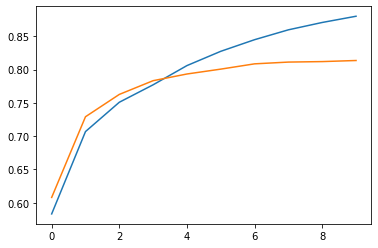

In [ ]:
plt.plot(y,acc)
plt.plot(y,val_acc)

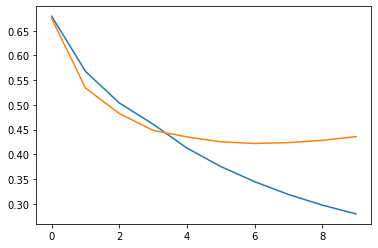

In [ ]:
plt.plot(y,loss_acc)
plt.plot(y,val_loss)

# Predict

In [ ]:
model=keras.models.load_model('/content/drive/MyDrive/Kaggle/Quora_pairs_question/model.h5')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 300)      80449800    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 50, 256)      330240      embedding[0][0]              

In [ ]:
test_df=pd.read_csv('/content/drive/MyDrive/Kaggle/Quora_pairs_question/test.csv.zip')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
test_df.dropna(inplace=True)

In [ ]:
test_df['clean_question2']=test_df['question1'].apply(clean)
#test_df['clean_question1']=test_df['question2'].apply(clean)

In [ ]:
test_df.fillna('empty')

,test_id,question1,question2,clean_question1,clean_question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...,microsoft choos cor m3 cor i3 hom surfac pro 4,surfac pro 4 comp ipad pro
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?,much cost hair transpl requir,hair transpl ag 24 much would cost
2,2,What but is the best way to send money from Ch...,What you send money to China?,send money chin,best way send money chin u
3,3,Which food not emulsifiers?,What foods fibre?,food fibr,food emuls
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?,start read,aberystwy start read
...,...,...,...,...,...
3563470,2345791,How do Peaks (TV series): Why did Leland kill ...,What is the most study scene in twin peaks?,study scen twin peak,peak tv sery leland kil laur palm
3563471,2345792,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?,quest fedex pack del,transit mean fedex track
3563472,2345793,What are some famous Romanian drinks (alcoholi...,Can a non-alcoholic restaurant be a huge success?,non alcohol resta hug success,fam rom drink alcohol non alcohol
3563473,2345794,What were the best and worst things about publ...,What are the best and worst things examination...,best worst thing examin publ transit visakhapa...,"best worst thing publ transit proddatur, andhr..."


In [ ]:
Q_2=tokenizer.texts_to_sequences(test_df['clean_question1'].values)
Q_1=tokenizer.texts_to_sequences(test_df['clean_question2'].values)

Q_1=keras.preprocessing.sequence.pad_sequences(Q_1,padding='post',maxlen=50)
Q_2=keras.preprocessing.sequence.pad_sequences(Q_2,padding='post',maxlen=50)
Q_1.shape,Q_2.shape

((3563466, 50), (3563466, 50))

In [ ]:
with tf.device("/device:GPU:0"):
  y_pred=model.predict([Q_1,Q_2])

In [ ]:
submission=pd.read_csv('/content/drive/MyDrive/Kaggle/Quora_pairs_question/sample_submission.csv.zip')

In [ ]:
y_pred.shape

(3563466, 1)

In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345796 entries, 0 to 2345795
Data columns (total 2 columns):
 #   Column        Dtype
---  ------        -----
 0   test_id       int64
 1   is_duplicate  int64
dtypes: int64(2)
memory usage: 35.8 MB


In [ ]:
test_df['is_duplicate']=y_pred

In [ ]:
submission=test_df[['test_id','is_duplicate']]

In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3563466 entries, 0 to 3563474
Data columns (total 2 columns):
 #   Column        Dtype  
---  ------        -----  
 0   test_id       object 
 1   is_duplicate  float32
dtypes: float32(1), object(1)
memory usage: 68.0+ MB


In [ ]:
submission.to_csv('/content/drive/MyDrive/Kaggle/Quora_pairs_question/submission.csv',index=False)

array([[0.00483412],
       [0.13996361],
       [0.48302978],
       [0.27382645],
       [0.6091044 ],
       [0.00237097],
       [0.83158594],
       [0.98182124],
       [0.5849133 ],
       [0.21343625]], dtype=float32)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install flask-ngrok

# load model

to make predict you should first import model then run this cell bellow 

In [3]:
import re
import os

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.model_selection as model_selection
import sklearn.metrics as metrics 

import heapq
import pickle
import nltk
nltk.download('popular')
from nltk.corpus import stopwords
STOPWORDS=set(stopwords.words('english'))
lemmatizer=nltk.WordNetLemmatizer()
stemmer=nltk.LancasterStemmer()

def clean(data):
  data=re.sub(r'[^a-zA-Z0-9,]',' ',data)
  data=data.lower()
  res=[word for word in data.split() if word not in STOPWORDS]
  res=[stemmer.stem(word) for word in res]
  res=[lemmatizer.lemmatize(word) for word in res]
  return ' '.join(res)

def load_database():
  #paths for khalil
  # /content/drive/MyDrive/Kaggle/Quora_pairs_question/clean_database.npy 
  # /content/drive/MyDrive/Kaggle/Quora_pairs_question/database.npy
  clean_data= np.load('/gdrive/MyDrive/Quora_pairs_question/clean_database.npy',allow_pickle=True)
  data=np.load('/gdrive/MyDrive/Quora_pairs_question/database.npy',allow_pickle=True)
  return data,clean_data


def make_predict(model,String,List_String,tokenizer,data):
  """
  This function return the index of the best three sequnce lock like the String we pass to it 
  
  parameter:
    model: is the model we wont to predict throgh it .
    String : the sequnce we wont to figure question simeller.
    List_String : is the list of sequnce we have as Database.
  """
  String=list(map(clean,String))
  String=String*len(List_String)
  q1=np.asarray(String)
  q2_list=np.asarray(List_String)
  q1=tokenizer.texts_to_sequences(q1)
  q2_list=tokenizer.texts_to_sequences(q2_list)
  q1=keras.preprocessing.sequence.pad_sequences(q1,padding='post',maxlen=50)
  q2_list=keras.preprocessing.sequence.pad_sequences(q2_list,padding='post',maxlen=50)
  y_pred=model.predict([q1,q2_list])
  index=heapq.nlargest(3,range(len(y_pred)),y_pred.take)
  for i in index:
     yield data[i]
  

def load_json_model(json_path,wigth_path):
  with open(json_path,'r') as f:
    json_model=f.read()
  model=keras.models.model_from_json(json_model)
  model.load_weights(wigth_path)
  return model

#paths for khalil
# /content/drive/MyDrive/Kaggle/Quora_pairs_question/tokenizer.pickle

with open('/gdrive/MyDrive/Quora_pairs_question/tokenizer.pickle','rb') as f:
  tokenizer=pickle.load(f)

data,clean_data=load_database()

#paths for khalil
# /content/drive/MyDrive/Kaggle/Quora_pairs_question/model_2
# /content/drive/MyDrive/Kaggle/Quora_pairs_question/model_2

json_path='/gdrive/MyDrive/Quora_pairs_question/model_2.json'
wight_path='/gdrive/MyDrive/Quora_pairs_question/model_2.h5'
model=load_json_model(json_path,wight_path)
model.summary()

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [4]:
string=['how to make money']
list(make_predict(model,string,clean_data,tokenizer,data))

['How can I make money through the Internet?',
 'What were the major effects of the cambodia earthquake, and how do these effects compare to the Kamchatca earthquakes in 1952?',
 'What is best way to make money online?']

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import *  
app = Flask(__name__)  
run_with_ngrok(app)   #starts ngrok when the app is run

@app.route('/', methods = ['POST'])  
def duplicate_questions():  
    if request.method == 'POST': 
        question=request.form["question"]
        li=[]
        li.append(question)
        li2=list(make_predict(model,li,clean_data,tokenizer,data))
        HtmlCode = """<html>
        <head></head>
        <body style="background-color: hsla(89, 43%, 51%, 0.3);">
        <h1 style='text-align: center;color: #343434;text-shadow: 0 2px white, 0 3px #777;'>The Most Three Duplicate Questions</h1>
        <dl>
        <dt style="font-weight: bold;margin-left: 20px;">Question 1:</dt>
        <dd style="color: rgb(165,42,42);font-family: Perpetua;font-size:30">"""+li2[0]+"""
        </dd>
        <dt style="font-weight: bold;margin-left: 20px;">Question 2:</dt>
        <dd style="color: rgb(165,42,42);font-family: Perpetua;font-size:30">"""+li2[1]+"""
        </dd>
        <dt style="font-weight: bold;margin-left: 20px;">Question 3:</dt>
        <dd style="color: rgb(165,42,42);font-family: Perpetua;font-size:30">"""+li2[2]+"""
        </dd>
        </dl>
        </body>
        </html>"""
        return HtmlCode

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://d7d09d5e221e.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [10/Jan/2021 15:07:31] "GET / HTTP/1.1" 405 -
127.0.0.1 - - [10/Jan/2021 15:07:32] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [10/Jan/2021 15:07:47] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [10/Jan/2021 15:08:15] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [10/Jan/2021 15:09:07] "POST / HTTP/1.1" 200 -
